# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `prestamos.csv` que se proporciona junto con la práctica. 

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `loan_amnt` es la cantidad de dinero solicitada en dólares
  - `purpose` es el propósito para el que se solicitó el préstamo
  - `revenue` son los ingresos anuales en dólares de la persona que solicitó el préstamos
  - `dti_n` es el porcentaje de endeudamiento sobre los ingresos anuales de la persona que solicitó el préstamo
  - `fico_n` se trata de un indicador de solvencia de la persona que solicitó el préstamo. A mayor puntuación, mayor solvencia, y además se cuenta con estos rangos orientativoss:
    - 300-550: Pobre
    - 550-620: Subprime (alto riesgo)
    - 620-680: Crédito aceptable
    - 680-740: Buen crédito
    - 740-850: Excelente crédito

  -`home_ownership_n` es una variable categórica que indica la situación de vivienda en la que vive la persona solicitante
    - `OWN` es en propiedad
    - `MORTAGAGE` indica que está hipotecada
    - `RENT` indica que vive en alquiler
    - `OTHER` es una categoría que agrega otras posibilidades

- `emp_length` es una variable ordinal, no es estrictamente numérica, ya que el valor 0 denota que no consta información, los valores entre 1 y 10 indican una permanencia inferior a X años, y el valor 11 indica una permanencia superior a 10 años.
- `Default` es la variable que usaremos como **variable objetivo** del conjunto de datos e indica si la persona incumplió (incurrió en *default*) o no el préstamo.


Como pandas no tiene forma de saber que las variables `home_ownership_n`, `purpose`, `emp_length` y `Default` son en realidad categóricas, debes indicárselo tú.

In [2]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
df = pd.read_csv("prestamos.csv")
df

,loan_amnt,purpose,revenue,dti_n,fico_n,home_ownership_n,emp_length_n,Default
0,32000,car,135000.0,18.93,687.0,MORTGAGE,1,0
1,32000,car,90000.0,9.29,822.0,MORTGAGE,10,1
2,30000,car,95000.0,1.34,722.0,RENT,11,0
3,25750,car,230000.0,6.42,747.0,MORTGAGE,11,0
4,25200,car,72000.0,30.95,692.0,OWN,11,0
...,...,...,...,...,...,...,...,...
13789,1275,vacation,42000.0,31.89,792.0,RENT,0,0
13790,1200,vacation,36000.0,12.27,747.0,MORTGAGE,8,0
13791,1000,vacation,76000.0,25.26,702.0,MORTGAGE,11,0
13792,1000,vacation,32000.0,17.70,747.0,MORTGAGE,0,0


In [4]:
## home_ownership_n como categorica
c = pd.Categorical(df['home_ownership_n'], categories = ['OWN', 'MORTGAGE', 'RENT', 'OTHER'], ordered=False)
df['home_ownership_n'] = c
df

,loan_amnt,purpose,revenue,dti_n,fico_n,home_ownership_n,emp_length_n,Default
0,32000,car,135000.0,18.93,687.0,MORTGAGE,1,0
1,32000,car,90000.0,9.29,822.0,MORTGAGE,10,1
2,30000,car,95000.0,1.34,722.0,RENT,11,0
3,25750,car,230000.0,6.42,747.0,MORTGAGE,11,0
4,25200,car,72000.0,30.95,692.0,OWN,11,0
...,...,...,...,...,...,...,...,...
13789,1275,vacation,42000.0,31.89,792.0,RENT,0,0
13790,1200,vacation,36000.0,12.27,747.0,MORTGAGE,8,0
13791,1000,vacation,76000.0,25.26,702.0,MORTGAGE,11,0
13792,1000,vacation,32000.0,17.70,747.0,MORTGAGE,0,0


In [5]:
## purpose como categorica
c = pd.Categorical(df['purpose'], ordered=False)
df['purpose'] = c
df

,loan_amnt,purpose,revenue,dti_n,fico_n,home_ownership_n,emp_length_n,Default
0,32000,car,135000.0,18.93,687.0,MORTGAGE,1,0
1,32000,car,90000.0,9.29,822.0,MORTGAGE,10,1
2,30000,car,95000.0,1.34,722.0,RENT,11,0
3,25750,car,230000.0,6.42,747.0,MORTGAGE,11,0
4,25200,car,72000.0,30.95,692.0,OWN,11,0
...,...,...,...,...,...,...,...,...
13789,1275,vacation,42000.0,31.89,792.0,RENT,0,0
13790,1200,vacation,36000.0,12.27,747.0,MORTGAGE,8,0
13791,1000,vacation,76000.0,25.26,702.0,MORTGAGE,11,0
13792,1000,vacation,32000.0,17.70,747.0,MORTGAGE,0,0


In [6]:
## emp_length_n como categorica
c = pd.Categorical(df['emp_length_n'], ordered=False)
df['emp_length_n'] = c
df

,loan_amnt,purpose,revenue,dti_n,fico_n,home_ownership_n,emp_length_n,Default
0,32000,car,135000.0,18.93,687.0,MORTGAGE,1,0
1,32000,car,90000.0,9.29,822.0,MORTGAGE,10,1
2,30000,car,95000.0,1.34,722.0,RENT,11,0
3,25750,car,230000.0,6.42,747.0,MORTGAGE,11,0
4,25200,car,72000.0,30.95,692.0,OWN,11,0
...,...,...,...,...,...,...,...,...
13789,1275,vacation,42000.0,31.89,792.0,RENT,0,0
13790,1200,vacation,36000.0,12.27,747.0,MORTGAGE,8,0
13791,1000,vacation,76000.0,25.26,702.0,MORTGAGE,11,0
13792,1000,vacation,32000.0,17.70,747.0,MORTGAGE,0,0


In [8]:
## Default como categorica
c = pd.Categorical(df['Default'], ordered=False)
df['Default'] = c
df

,loan_amnt,purpose,revenue,dti_n,fico_n,home_ownership_n,emp_length_n,Default
0,32000,car,135000.0,18.93,687.0,MORTGAGE,1,0
1,32000,car,90000.0,9.29,822.0,MORTGAGE,10,1
2,30000,car,95000.0,1.34,722.0,RENT,11,0
3,25750,car,230000.0,6.42,747.0,MORTGAGE,11,0
4,25200,car,72000.0,30.95,692.0,OWN,11,0
...,...,...,...,...,...,...,...,...
13789,1275,vacation,42000.0,31.89,792.0,RENT,0,0
13790,1200,vacation,36000.0,12.27,747.0,MORTGAGE,8,0
13791,1000,vacation,76000.0,25.26,702.0,MORTGAGE,11,0
13792,1000,vacation,32000.0,17.70,747.0,MORTGAGE,0,0


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [9]:
## Hacemos una copia del dataframe que solo incluya las variables numeicas
df_num = df.drop(['home_ownership_n', 'purpose', 'emp_length_n', 'Default'], axis = 1)
df_num

,loan_amnt,revenue,dti_n,fico_n
0,32000,135000.0,18.93,687.0
1,32000,90000.0,9.29,822.0
2,30000,95000.0,1.34,722.0
3,25750,230000.0,6.42,747.0
4,25200,72000.0,30.95,692.0
...,...,...,...,...
13789,1275,42000.0,31.89,792.0
13790,1200,36000.0,12.27,747.0
13791,1000,76000.0,25.26,702.0
13792,1000,32000.0,17.70,747.0


In [10]:
df_num.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,13794.0,14507.833116,9037.938271,1000.0,7300.0,12000.000,20000.0000,40000.00
revenue,13794.0,79737.299507,56463.579892,7000.0,48000.0,68000.000,97000.0000,1650000.00
dti_n,13794.0,18.825106,9.795986,0.0,12.2,18.085,24.7575,190.87
fico_n,13794.0,699.106822,32.825754,662.0,672.0,692.000,717.0000,847.50


En el caso de la variable "loan_amnt" vemos que la media se acerca más al mínimo. De hecho, si nos fijamos en los perceptiles, la mitad del valor máximo se encuentra en el 75%. Esto nos hace pensar que la mayoría de los créditos solicitados son de un valor bajo. En cuanto a los ingresos anuales, vemos una desviación típica muy grande, por lo que sabemos que va a haber una gran diferencia entre los valores extremos y la media. En este caso, la repartición de los perceptiles es más uniforme. En la variable "dti_n" vemos que pasa lo mismo que con la primera: el perceptil 75% es muy inferior al máximo. Esta clase de datos nos hace pensar que hay un valor muy alto que dispara la media pero que no es muy relevante en otros aspectos. En cuanto a la solvencia, vemos unos perceptiles uniformes, aunque la media está por debajo de la mitad (perceptil 50%). 

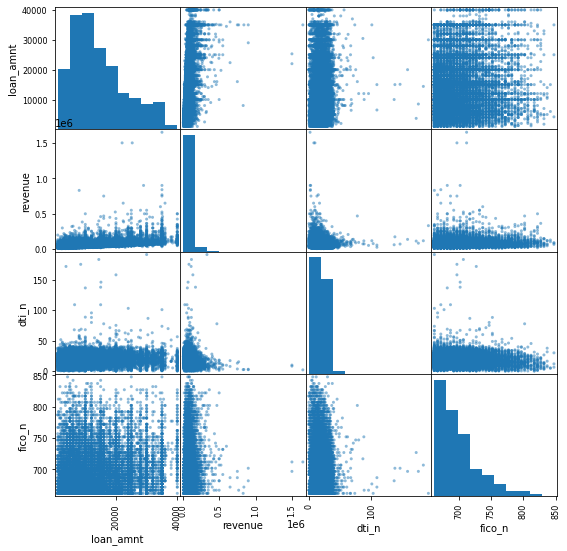

In [11]:
disp = pd.plotting.scatter_matrix( 
    df_num.loc[:, ['loan_amnt', 'revenue', 'dti_n', 'fico_n']], 
    figsize = (9,9), 
    diagonal = 'hist')

In [13]:
df_num.corr()

,loan_amnt,revenue,dti_n,fico_n
loan_amnt,1.000000,0.424460,0.034134,0.090869
revenue,0.424460,1.000000,-0.137616,0.091204
dti_n,0.034134,-0.137616,1.000000,-0.057580
fico_n,0.090869,0.091204,-0.057580,1.000000


Arriba encontramos los diagramas de dispersión que muestran la relación entre todas las variables numéricas y sus correlaciones. En ambos sitios podemos ver que quie el endeudamiento influye negativamente (hace bajar) en los ingresos y en la solvencia. En cualquier caso, todas las relaciones son flojas menos la de los ingresos anuales con la cantidad solicitada. En las gráficas destacamos el amplio rango de valores de la cantidad solicitada y la solvencia, que en la tabla podemos ver como una de las relaciones positivas menores.


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [15]:
## Hacemos una copia del dataframe que solo incluya las variables categoricas
df_cat = df.drop(['loan_amnt', 'revenue', 'dti_n', 'fico_n'], axis = 1)
df_cat

,purpose,home_ownership_n,emp_length_n,Default
0,car,MORTGAGE,1,0
1,car,MORTGAGE,10,1
2,car,RENT,11,0
3,car,MORTGAGE,11,0
4,car,OWN,11,0
...,...,...,...,...
13789,vacation,RENT,0,0
13790,vacation,MORTGAGE,8,0
13791,vacation,MORTGAGE,11,0
13792,vacation,MORTGAGE,0,0


In [16]:
df_cat.describe().transpose()

,count,unique,top,freq
purpose,13794,12,debt_consolidation,7841
home_ownership_n,13794,4,MORTGAGE,6850
emp_length_n,13794,12,11,4612
Default,13794,2,0,10785


Las siguientes gráficas muestran el porcentaje de cada elemento de las variables categóricas.

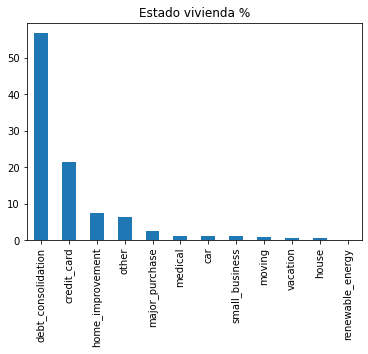

In [19]:
plot = (100 * df_cat['purpose'].value_counts() / len(df_cat['purpose'])).plot(
kind='bar', title='Motivo %')

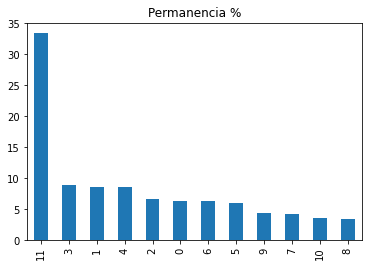

In [21]:
plot = (100 * df_cat['emp_length_n'].value_counts() / len(df_cat['emp_length_n'])).plot(
kind='bar', title='Permanencia %')

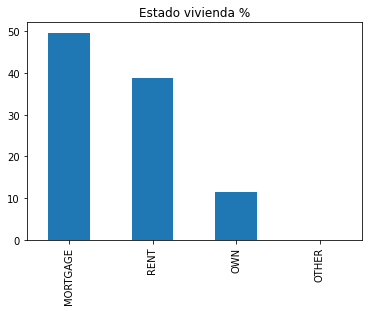

In [20]:
plot = (100 * df_cat['home_ownership_n'].value_counts() / len(df_cat['home_ownership_n'])).plot(
kind='bar', title='Estado vivienda %')

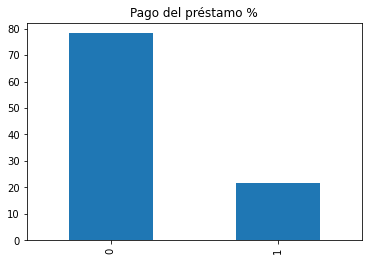

In [23]:
plot = (100 * df_cat['Default'].value_counts() / len(df_cat['Default'])).plot(
kind='bar', title='Pago del préstamo %')

A continuación analizaremos las gráficas y la tabla superiores. 

Al analizar las variables categóricas vemos que hay 12 motivos por los que pedir un crédito, el más pedido es para la consolidación de la deuda, con un 58% de los créditos. El resto de los motivos bajan del 20% de los créditos. En cuanto a la propiedad de la vivienda, el 50% está hipotecado, el 40% de alquiler y el 10% restante son propietarios. Estudiando la permanencia vemo que el 34% de los solicitantes llevan más de 10 años de permanencia. Las permanencias inferiores a 10 años están muy repartidas. En cuanto al impago, que es la variable de salida, podemos observar que el 20% de los solicitantes incumplirían el pago.

## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables verdaderamente numéricas. Crea un nuevo dataframe que sólo contenga las variables `loan_amnt`, `revenue`, `dti_n` y `fico_n`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de préstamos similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [11]:
## Nos quedamos con el dataframe de variables numéricas del apartado anterior
df_num

,loan_amnt,revenue,dti_n,fico_n
0,32000,135000.0,18.93,687.0
1,32000,90000.0,9.29,822.0
2,30000,95000.0,1.34,722.0
3,25750,230000.0,6.42,747.0
4,25200,72000.0,30.95,692.0
...,...,...,...,...
13789,1275,42000.0,31.89,792.0
13790,1200,36000.0,12.27,747.0
13791,1000,76000.0,25.26,702.0
13792,1000,32000.0,17.70,747.0


En este caso y al tratarse de un algoritmo k-Means, es necesario normalizar los datos. Si no los normalizaramos, estaríamos dando una importancia mucho mayor a la cantidad de dinero solicitada (loan_amnt) y a los ingresos anuales (revenue), frente a porcentaje de endeudamiento (dti_n) y el grado de solvencia (fico_n). Como hemos visto en el análisis de los datos, los valores mínimos de estas variables son 1000 y 7000 mientras que los valores máximos de endeudamiento y solvencia son de 190 y 847. Esta diferencia tan grande haría que se tuvieran muy en cuenta los ingresos y un poco en cuenta la cantidad solicitada, mientras que los otros dos valores no afectarían apenas al agrupamiento. A continuación estudiamos si es necesario escalar o estandarizar.

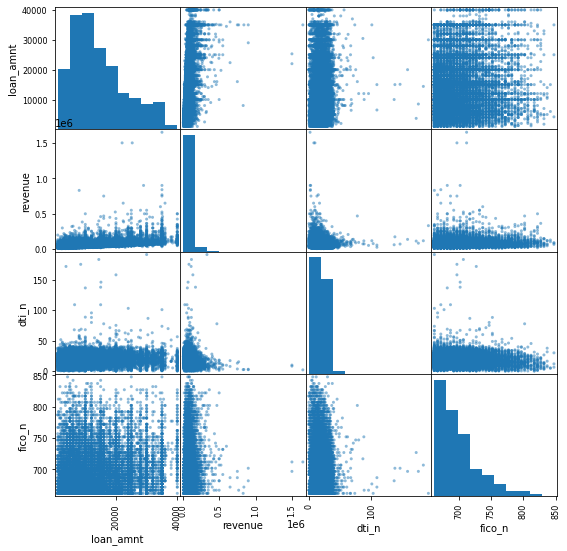

In [12]:
disp = pd.plotting.scatter_matrix( 
    df_num.loc[:, ['loan_amnt', 'revenue', 'dti_n', 'fico_n']], 
    figsize = (9,9), 
    diagonal = 'hist')

En el cuadro anterior podemos ver el diagrama de dispersión de las variables. Nos interesan aquellos que relacionan variables distintas, por lo que no tendremos en cuenta la diagonal. En este diagrama podemos ver como ninguna de las distribuciones entre variables sigue una distribución normal, por lo que a priori optaremos por re-escalar los datos (entre 0 y 1) utilizando la función MinMaxScaler, frente a la opción de estandarizarlos (poner su media a 0 y su desviación típica a 1), que sería la mejor opción si nuestros datos siguieran una distribución similar a la normal. A continuación re-escalamos los datos y lo convertimos en un dataframe.

In [60]:
scaler = MinMaxScaler()
df_num = scaler.fit_transform(df_num)
df_num = pd.DataFrame(df_num, columns=['loan_amnt', 'revenue', 'dti_n', 'fico_n'])
df_num

,loan_amnt,revenue,dti_n,fico_n
0,0.794872,0.077906,0.099177,0.134771
1,0.794872,0.050517,0.048672,0.862534
2,0.743590,0.053561,0.007020,0.323450
3,0.634615,0.135727,0.033635,0.458221
4,0.620513,0.039562,0.162152,0.161725
...,...,...,...,...
13789,0.007051,0.021302,0.167077,0.700809
13790,0.005128,0.017651,0.064285,0.458221
13791,0.000000,0.041996,0.132341,0.215633
13792,0.000000,0.015216,0.092733,0.458221


In [28]:
df_num.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,13794.0,0.346355,0.231742,0.0,0.161538,0.282051,0.487179,1.0
revenue,13794.0,0.044271,0.034366,0.0,0.024954,0.037127,0.054778,1.0
dti_n,13794.0,0.098628,0.051323,0.0,0.063918,0.094750,0.129709,1.0
fico_n,13794.0,0.200037,0.176958,0.0,0.053908,0.161725,0.296496,1.0


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo con la puntuación (con la función `KMeans.score()`), el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

A continuación calculamos y pintamos el índice de Davies Boulding, el coeficiente de Silhouette y el diagrama del codo.

In [35]:
K_MAX = 11
db = np.zeros(K_MAX-2)
s = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(df_num)
     
    db[k-2] = davies_bouldin_score(df_num.values, km.labels_) 
    s[k-2] = silhouette_score(df_num.values, km.labels_, metric='euclidean')

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

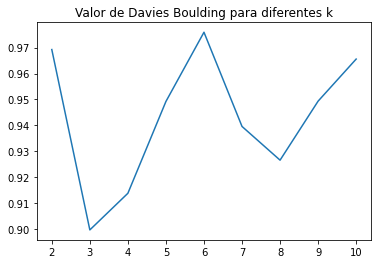

In [36]:
plt.plot(range(2, K_MAX), db)
plt.title('Valor de Davies Boulding para diferentes k')

Text(0.5, 1.0, 'Valor de Silhouette para diferentes k')

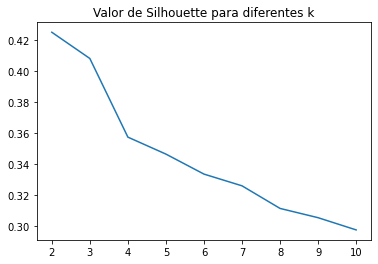

In [37]:
plt.plot(range(2, K_MAX), s)
plt.title('Valor de Silhouette para diferentes k')

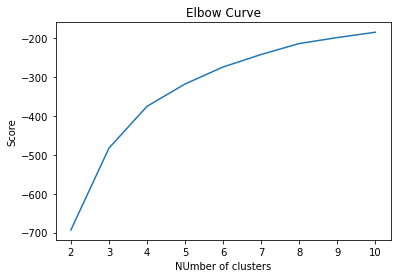

In [38]:
 
kmeans = [KMeans(n_clusters = i) for i in range (2, K_MAX)]
score = [kmeans[i].fit(df_num).score(df_num) for i in range (len(kmeans))]
plt.plot(range (2, K_MAX), score)
plt.xlabel('NUmber of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Cuando analizamos los clusters Davies Boulding, el mejor cluster es el que tiene un valor menor. En el caso del coeficiente de Silhouette es a la inverssa: el mejor cluster es aquel que tiene un coeficiente mayor. Cuando pintamos el diagrama de codo, decimos que el cluster más óptimo es aquel en el que se produce un cambio significativo en la pendiente.

Al analizar estos valores aplicados a nuestros datos vemos que el número de clusters más óptimo según el índice de Davies Boulding es 3 y según Silhouette es 2. Al analizar el diagrama de codo (que en este caso vemos al revés ya que la puntuación de los clusters es negtaiva) vemos que el cambio más significativo de pendiente se produce cuando agrupamos con 3 clusters. Por lo tanto concluimos que el número de clusters más óptimo para el agrupamiento de nuestros datos es el 3.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 3, elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de préstamos quedan en cada cluster? Según dicho perfil, ¿qué cluster te parece que tendrá una mayor tasa de "default"? Corrobóralo calculando para cada cluster la proporción de préstamos que acabaron en "default".

Pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

Aplicamos el algoritmo K-Means con 3 clusters y creamos una copia de nuestro dataframe donde se incluye el cluster de cada solicitud de préstamo. Sacamos los descriptores estadísticos de cada grupo respecto de cada una de las 4 variables que han influido en la solución (loan_amnt, revenue, dti_n, fico_n).

In [61]:
km2 = KMeans(init = 'random', n_clusters = 3, random_state = 333)
km2.fit(df_num)
df_copia = df.assign( cluster = pd.Series(data = km2.labels_, index = df.index))
df_copia

,loan_amnt,purpose,revenue,dti_n,fico_n,home_ownership_n,emp_length_n,Default,cluster
0,32000,car,135000.0,18.93,687.0,MORTGAGE,1,0,1
1,32000,car,90000.0,9.29,822.0,MORTGAGE,10,1,2
2,30000,car,95000.0,1.34,722.0,RENT,11,0,1
3,25750,car,230000.0,6.42,747.0,MORTGAGE,11,0,1
4,25200,car,72000.0,30.95,692.0,OWN,11,0,1
...,...,...,...,...,...,...,...,...,...
13789,1275,vacation,42000.0,31.89,792.0,RENT,0,0,2
13790,1200,vacation,36000.0,12.27,747.0,MORTGAGE,8,0,2
13791,1000,vacation,76000.0,25.26,702.0,MORTGAGE,11,0,0
13792,1000,vacation,32000.0,17.70,747.0,MORTGAGE,0,0,2


In [46]:
df_copia.loc[: ,['loan_amnt','cluster']].groupby(['cluster']).describe()

loan_amnt                                                        \
            count          mean          std      min      25%      50%   
cluster                                                                   
0          7489.0   9440.606222  4392.061290   1000.0   6000.0   9700.0   
1          3879.0  26373.188966  5888.811039  17375.0  20750.0  25000.0   
2          2426.0  11178.380049  5830.861894   1000.0   6075.0  10000.0   

                           
             75%      max  
cluster                    
0        12600.0  19075.0  
1        30000.0  40000.0  
2        15000.0  35000.0

In [47]:
df_copia.loc[: ,['revenue','cluster']].groupby(['cluster']).describe()

revenue                                                          \
          count           mean           std      min      25%      50%   
cluster                                                                   
0        7489.0   65363.467390  37753.038978   7000.0  41000.0  58000.0   
1        3879.0  111112.368350  78091.395361  25000.0  70040.0  94000.0   
2        2426.0   73942.467143  41641.982049   9036.0  46000.0  65000.0   

                              
              75%        max  
cluster                       
0         80000.0   830000.0  
1        126210.0  1650000.0  
2         90000.0   469000.0

In [48]:
df_copia.loc[: ,['dti_n','cluster']].groupby(['cluster']).describe()

dti_n                                                          
          count       mean        std   min     25%    50%    75%     max
cluster                                                                  
0        7489.0  18.898169   9.691316  0.00  12.290  18.12  24.84  182.81
1        3879.0  19.379948   9.788896  0.22  12.995  18.80  25.02  190.87
2        2426.0  17.712407  10.040583  0.00  10.495  16.85  23.76  171.39

In [49]:
df_copia.loc[: ,['fico_n','cluster']].groupby(['cluster']).describe()

fico_n                                                          
          count        mean        std    min    25%    50%    75%    max
cluster                                                                  
0        7489.0  682.964748  15.861163  662.0  667.0  682.0  697.0  722.0
1        3879.0  698.630575  27.777442  662.0  677.0  692.0  712.0  827.0
2        2426.0  749.698475  27.430964  717.0  727.0  742.0  767.0  847.5

### Análisis de los datos en su contexto

Antes de analizar los clusters para las distintas variables, cabe mencionar que el cluster más numeroso es el 0, seguido por el 1 y el menos numeroso es el 2.

Empezaremos estudiando los ingresos anuales de cada solicitante (revenue). Si nos fijamos en la media y los valores máximos y mínimos podemos ver una clase claramente diferenciada, la correspondiente al cluster 1, que es aquella que recive más ingresos. En cuanto a las otras 2 clases, ambas son muy similares en cuanto a sus extremos (máximos y mínimos), sin embargo, al fijarnos en la media y en los perceptiles, podemos deducir que el cluster 0 es el del grupo con menos ingresos, teniendo el cluster 2 como aquel que se encuentra en un punto intermedio. Si comparamos este resultado con la cantidad de dinero solicitada (loan_amnt) vemos que el cluster con individuos con un mayor número de ingresos es aquel que solicita los préstamos más cuantiosos, mientras que el cluster donde los individuos tienen un ingreso menor solicitan prestamos menores. En cuanto al cluster intermedio (el 2), solicitan unas cantidades más variables, cuyos rangos están entre los mínimos del cluster 0 y los máximos del cluster 1, lo que hace que, en el caso de esta variable, el cluster 2 podría agruparse en los otros dos.

Ahora pasaremos a estudiar las variables que tienen un menor rango de valores: la solvencia (fico_n) y el endeudamiento (dti_n). En cuanto al grado de solvencia, el cluster 0 es el que menos tiene, ya que es el que ingresa menos dinero al año. Teniendo en cuenta que el cluster 1 es el que más ingresos tiene, cabe pensar que es el que más solvencia media tiene. Sin embargo, al ser la clase que más dinero solicita, su solvencia baja, haciendo que el cluster con mayor solvencia media sea el 2. Cabría esperar que el endeudamiento fuera inverso a la solvencia y, de hecho, lo es en el caso del cluster 2, que es el que menos porcentaje de endeudamiento tiene. Sin embargo es el cluste 1 el que tiene un mayor porcentaje de endeudamiento, ya que, como hemos mencionado anteriormente, es el grupo que más dinero solicita de préstamo.

Como conclusión podemos decir que el reparto de los tres clusters se ha hecho de la siguiente manera: El cluster 0 es aque con menos ingresos al año, que solicita poco dinero ya que su endeudamiento es alto y su solvencia baja. El cluster 1 es aquel que más dinero gana al año y que más cantidad solicita. Debido a toda esta cantidad solicitada, su endeudamiento es alto y su solvencia más baja de lo que cabría esperar. Por último, el cluster 2 sería aquel con unos ingresos anuales medios, un grado de solvencia alto y un porcentaje de endeudamiento bajo.

Teniendo en cuenta este análisis, podemos decir que el cluster con una menor tasa de "default" es el cluster 2, debido a sus ya mencionados valores de solvencia y endeudamiento. Los clusters 1 y 0 debería estar muy igualados en cuanto a su tasa de "default", aunque estimamos que la del cluster 1 será menor. A continuación estudiaremos esa tasa de default para los 3 clusters.

In [87]:
aux2 = df_copia.groupby(by = ['Default', 'cluster'])
aux2.describe()

loan_amnt                                                \
                    count          mean          std      min       25%   
Default cluster                                                           
0       0          5787.0   9248.475030  4394.539713   1000.0   5600.00   
        1          2866.0  26449.110258  5886.030404  17375.0  20962.50   
        2          2132.0  11093.492026  5808.540082   1000.0   6000.00   
1       0          1702.0  10093.874853  4321.443073   1000.0   6500.00   
        1          1013.0  26158.390918  5894.280861  17425.0  20425.00   
        2           294.0  11793.962585  5964.222085   1000.0   7206.25   

                                           revenue                 ... fico_n  \
                     50%      75%      max   count           mean  ...    75%   
Default cluster                                                    ...          
0       0         9100.0  12000.0  19075.0  5787.0   66647.899699  ...  697.0   
        1        25000.0  30000.0  40000.0  2866.0  114745.269606  ...  717.0   
        2        10000.0  15000.0  35000.0  2132.0   75129.092444  ...  767.0   
1       0        10000.0  14000.0  19000.0  1702.0   60996.246604  ...  692.0   
        1        25000.0  30000.0  40000.0  1013.0  100834.090958  ...  707.0   
        2        11200.0  15000.0  32000.0   294.0   65337.415646  ...  752.0   

                       emp_length_n                                           \
                   max        count      mean       std  min  25%  50%   75%   
Default cluster                                                                
0       0        722.0       5787.0  6.326767  3.968879  0.0  3.0  6.0  11.0   
        1        827.0       2866.0  7.060363  3.904200  0.0  3.0  8.0  11.0   
        2        847.5       2132.0  6.508912  3.998993  0.0  3.0  6.0  11.0   
1       0        717.0       1702.0  5.897767  4.046047  0.0  2.0  5.0  11.0   
        1        817.0       1013.0  6.867720  3.946564  0.0  3.0  7.0  11.0   
        2        827.0        294.0  6.061224  4.283032  0.0  2.0  6.0  11.0   

                       
                  max  
Default cluster        
0       0        11.0  
        1        11.0  
        2        11.0  
1       0        11.0  
        1        11.0  
        2        11.0  

[6 rows x 40 columns]

Tras sacar las tasas de "default" hemos podido comprobar que la estimación era correcta. El cluster 2 cuanta con una tasa del 12%, el cluster 1, del 26% y el cluster 0 del 22%. Tal como estimamos, la el porcenaje menor es el del cluster 2. Sin embargo, el cluster 1 es el grupo que más imcumplió con el pago.

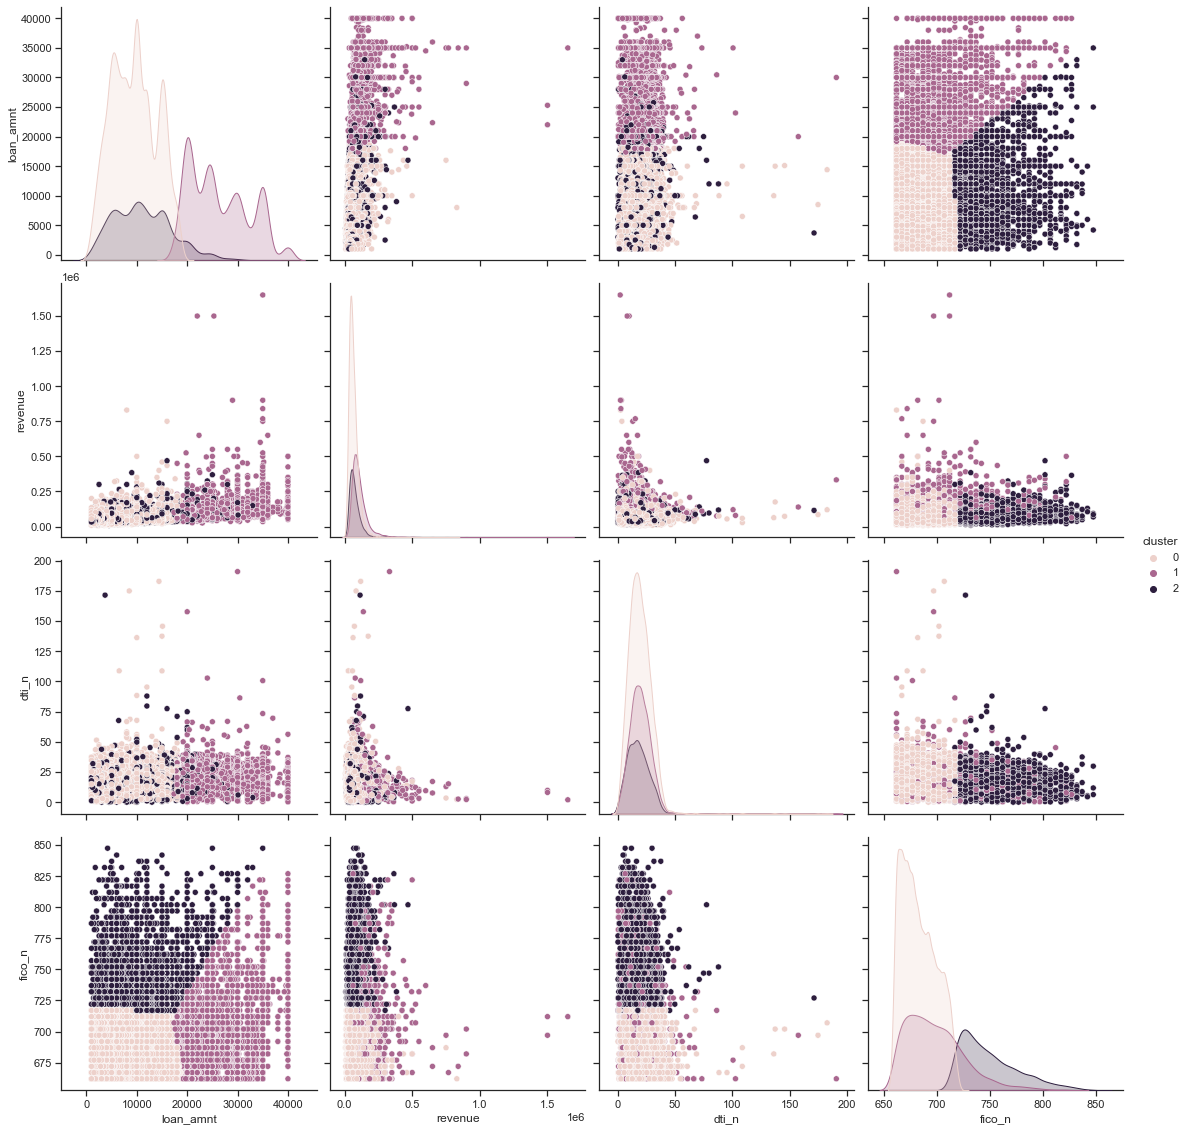

In [103]:
import seaborn as sb
sb.pairplot(df_copia, 
            hue='cluster',
            height=4,
            vars=['loan_amnt', 'revenue', 'dti_n', 'fico_n'],
            kind='scatter')

Debido a que esta matriz de diagramas es simétrica respecto a su diagonal, analizaremos solo los diagramas de dispersión de la parte de abajo de dicha diagonal.

Destacamos lo bien clasificados que quedan los elementos respecto de las variables solvencia y cantidad solicitada, donde se pueden ver los cluster claramente identificables. Podemos ver que en las relaciones de la cantidad solicitas con el endeudamiento y los ingresos anuales, los clusters 0 y 1 quedan claramente diferenciados mientras que que el cluster 2 se mezcla entre los otros 2 clusters. Esto ya lo comentamos en el análisis de datos después de aplicar el algoritmo K-Means. En cuanto a la solvencia, vemos que en sus relaciones con la ingresos anuales y endeudamiento, las clases 0 y 2 están bien diferenciadas mientras que el cluster 1 Se mezcla entre ambos. Por último, en la relación entre el endeudamineto y los ingresos los clusters se diferencian peor.  